<a href="https://colab.research.google.com/github/AnnasMazhar/Data-Science-Projects/blob/main/Kaggle_Vehicle_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

mporrting libraries and packages

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics


Data Collection and Preprocessing

In this phase we will just generally look at the data try to understand the categories determine our model clean and understand it in order to apply a model on it. This dataset is from Kaggle.

In [4]:
# loading the data 
vehicle_data = pd.read_csv('/content/car data.csv')

In [5]:
vehicle_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
# checking the datatpoints in the dataset
vehicle_data.shape

(301, 9)

In [7]:
vehicle_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [8]:
# checking the number of missing values
vehicle_data.sum().isnull()

Car_Name         False
Year             False
Selling_Price    False
Present_Price    False
Kms_Driven       False
Fuel_Type        False
Seller_Type      False
Transmission     False
Owner            False
dtype: bool

In [9]:
# looking at the distribution of categorical data
print(vehicle_data.Fuel_Type.value_counts())
print(vehicle_data.Seller_Type.value_counts())
print(vehicle_data.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


Encoding the categorical data

In [10]:
# encoding the data
vehicle_data.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}}, inplace=True)
vehicle_data.replace({'Seller_Type':{'Dealer':0, 'Individual':1}}, inplace=True)
vehicle_data.replace({'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [11]:
vehicle_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


Splitting the data into training and testing dataset

In [12]:
X = vehicle_data.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = vehicle_data['Selling_Price']

In [13]:
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [14]:
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

Model Training


      Linear regression
      The term regression is used when you try to find the relationship between variables.

      In Machine Learning and in statistical modeling, that relationship is used to predict the outcome of events.

      In this module, we will cover the following questions:

        Can we conclude that Average_Pulse and Duration are related to Calorie_Burnage?
        Can we use Average_Pulse and Duration to predict Calorie_Burnage?



In [16]:
lin_reg_model = LinearRegression()

In [19]:
lin_reg_model.fit(X_train, Y_train)

LinearRegression()

Model Evaluation

In [20]:
# training data predictions
training_predictions = lin_reg_model.predict(X_train)

In [23]:
# r squared error for checking accuracy
error_score = metrics.r2_score(Y_train, training_predictions)
print("r_squared error: ", error_score)

r_squared error:  0.8799451660493711


<function matplotlib.pyplot.show(*args, **kw)>

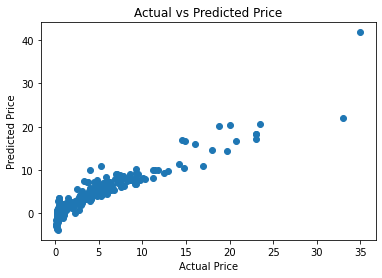

In [25]:
# plotting predicted prices and actual prices

plt.scatter(Y_train, training_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show


In [26]:
# prediction for test data
test_predictions = lin_reg_model.predict(X_test)

In [29]:
# r squared error
error_score  = metrics.r2_score(Y_test, test_predictions)
print("r_squared error: ", error_score)

r_squared error:  0.8365766715027051


<function matplotlib.pyplot.show(*args, **kw)>

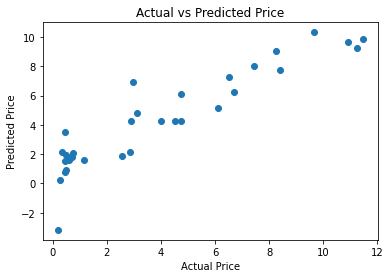

In [28]:
# plotting predicted prices and actual prices

plt.scatter(Y_test, test_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show

Lasso Regression
  
  
  Lasso regression is a regularization technique. It is used over regression methods for a more accurate prediction. This model uses shrinkage. Shrinkage is where data values are shrunk towards a central point as the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).

In [30]:
# loading the lasso rmodel 
lasso_model = Lasso()

In [31]:
lasso_model.fit(X_train,Y_train)

Lasso()

Model Evaluation

In [32]:
# training data predictions
training_predictions = lasso_model.predict(X_train)

In [33]:
# r squared error for checking accuracy
error_score = metrics.r2_score(Y_train, training_predictions)
print("r_squared error: ", error_score)

r_squared error:  0.8427856123435794


<function matplotlib.pyplot.show(*args, **kw)>

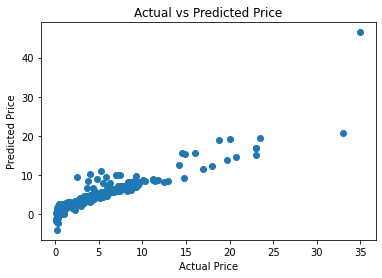

In [34]:
# plotting predicted prices and actual prices

plt.scatter(Y_train, training_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show


In [36]:
# prediction for test data
test_predictions = lasso_model.predict(X_test)

In [37]:
# r squared error
error_score  = metrics.r2_score(Y_test, test_predictions)
print("r_squared error: ", error_score)

r_squared error:  0.8709167941173195


<function matplotlib.pyplot.show(*args, **kw)>

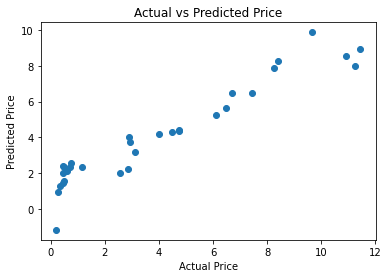

In [38]:
# plotting predicted prices and actual prices

plt.scatter(Y_test, test_predictions)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Price')
plt.show

I have tried both Linear regression and Lasso regression in this modle to proove the theory that Lasso model performs better in most cases.